<a href="https://colab.research.google.com/github/Natasha617/-advanced-machine-learning/blob/main/KNN_Students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Применение метода KNN для решения задачи классификации

Набор данных получен в результате переписи населения 1994 года и содержит информацию о некотором количестве людей, проживающих в США. Задача состоит в том, чтобы предсказать, зарабатывает человек более $50к в год или нет. Список признаков:

*   <b>age</b>: возраст человека.
*   <b>workclass</b>: статус занятости.
*   <b>fnlwgt</b>: количество людей, которое, по мнению переписи, представляет запись.
*   <b>education</b>: высший уровень образования, достигнутый человеком.
*   <b>education-num</b>: высший уровень образования, достигнутый человеком в числовой форме.
*   <b>marital-status</b>: семейное положение человека.
*   <b>occupation</b>: общий род занятий человека.
*   <b>relationship</b>: представляет то, чем этот человек является по отношению к другим (перекликается с признаком <b>marital-status</b>).
*   <b>race</b>: раса.
*   <b>sex</b>: пол.
*   <b>capital-gain</b>: прирост капитала.
*   <b>capital-loss</b>: убыток капитала.
*   <b>hours-per-week</b>: число рабочих часов в неделю.
*   <b>native-country</b>: страна происхождения.
*   <b>the label</b>: отклик -- зарабатывает больше $50к или меньше.



## Немного про метрики качества модели

Для начала рассмотрим так называемую матрицу ошибок (confusion matrix)
-- способ разделить объекты на $4$ группы в зависимости от комбинации
истинного класса и ответа классификатора:

-   TP (True Positives) -- верно классифицированные объекты, исходно     относящиеся к классу "$+1$";

-   TN (True Negatives) -- верно классифицированные объекты, исходно     относящиеся к классу "$-1$";

-   FN (False Negatives) -- неверно классифицированные объекты, исходно     относящиеся к классу "$+1$" (ошибка I рода);

-   FP (False Positives) -- неверно классифицированные объекты, исходно     относящиеся к классу "$-1$" (ошибка II рода).

Обычно, конечно, оперируют не абсолютными показателями, а относительными
-- долями (rates), находящимися в диапазоне от $0$ до $1$:

-   доля правильных ответов классификатора (иногда -- точность): $$\mathsf{Accuracy} = \frac{TP + TN}{TP + FP + FN + TN}.$$ Эта величина показывает отношение количества верно классифицированных объектов к общему количеству классифицируемых объектов и, грубо говоря, оценивает вероятность случайному объекту быть правильно классифицированным.

-   доля истинно положительных примеров -- True Positives Rate (TPR) или     Sensitivity (чувствительность) или Recall: $$\mathsf{T P R}=\frac{T P}{T P+F N}.$$ Эта величина показывает отношение количества верно классифицированных объектов, относящихся к классу "$+1$", к общему количеству объектов класса "$+1$". Иными словами -- это оценка вероятности, что объект, относящийся к классу "$+1$" будет классифицирован корректно.

-   доля ложно положительных примеров обозначается как -- False Positives Rate (FPR): $$\mathsf{F P R}=\frac{F P}{FP + TN}.$$ Величина показывает отношение количества неверно классифицированных объектов, относящихся к классу "$-1$", к общему количеству объектов класса "$-1$", или оценивает вероятность, что объект, относящийся к классу "$-1$", будет классифицирован неверно.

-   Специфичность (Specificity) или True Negatives Rate (TNR): $$\mathsf{TNR} = 1 - \mathsf{F P R} =\frac{T N}{T N+F P}.$$ Величина показывает отношение количества верно классифицированных объектов, относящихся к классу "$-1$", к общему количеству объектов класса "$-1$", или оценивает вероятность, что объект, относящийся к классу "$-1$", будет классифицирован верно.

-   Precision (точность): $$\mathsf{Precision} =\frac{TP}{TP + FP}.$$ Величина показывает, какая доля объектов, отнесенных классификатором к классу "$+1$", действительно относится к этому классу.

Естественно возникает вопрос, нет ли какого-то обобщающего критерия,
который может характеризовать качество построенной модели. Один из них --
так называемая $F$-мера ($F_1$-мера, $F$ score, $F_1$ score)
определяется следующим соотношением:
$$F = F_1 = 2 \cdot \frac{\mathsf{Precision} \cdot \mathsf{Recall}}{\mathsf{Precision} + \mathsf{Recall}}.$$

**Замечание**. *$F$-мера является средним гармоническим величин
$\mathsf{Precision}$ и $\mathsf{Recall}$ и заключена в диапазоне
$[0, 1]$. Среднее гармоническое обладает важным свойством: оно близко к
нулю, если хотя бы один из аргументов близок к нулю. Поэтому оно является
куда более предпочтительным, чем, скажем, среднее арифметическое: если
алгоритм относит все объекты к положительному классу, то
$\mathsf{Recall}= 1$, а $\mathsf{Precision}$, скорее всего, будет
небольшим. Но тогда среднее арифметическое будет больше, чем $0.5$, что,
конечно, никуда не годится.*

## Импорт библиотек и чтение набора данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
import seaborn as sns
from matplotlib import pyplot as plt
from google.colab import drive

Считайте набор данных в датафрейм. Исходя из описания признаков можно сразу избавиться от признаков <code>education</code> и <code>marital-status</code>. Удалите соответствующие колонки из набора данных.

In [2]:
drive.mount('/content/drive')
!cp "/content/drive/MyDrive/magamed/introduction ML/KNN/adult_data_train.csv" /content/data.csv

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
data = pd.read_csv('data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,32,Private,37210,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
1,43,Private,101950,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,0
2,20,?,122244,HS-grad,9,Never-married,?,Not-in-family,White,Female,0,0,28,United-States,0
3,40,Local-gov,24763,Some-college,10,Divorced,Transport-moving,Unmarried,White,Male,6849,0,40,United-States,0
4,24,Private,113936,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0


In [20]:
data = data.drop(columns = ['education', 'marital-status'])

Определите количество числовых и нечисловых признаков.

In [21]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education-num      int64
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
label              int64
dtype: object

In [22]:
len(data.dtypes [data.dtypes !='int64'])

6

Постройте гистограмму распределения объектов по классам. Вычислите долю объектов класса $0$.

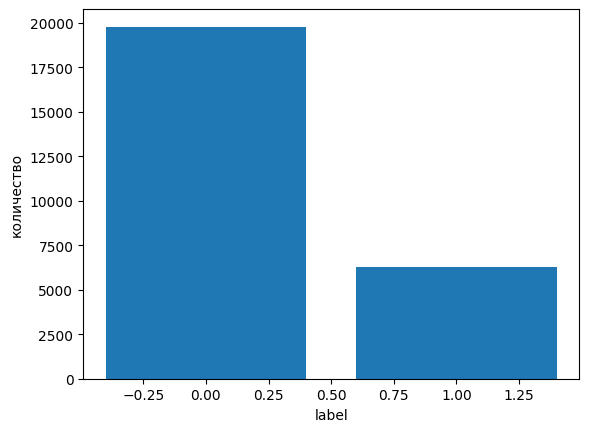

In [23]:
x_value = data['label'].value_counts()
plt.bar(x_value.index,x_value.values)
plt.xlabel('label')
plt.ylabel('количество')
plt.show()

In [24]:
data['label'].value_counts()

0    19775
1     6273
Name: label, dtype: int64

In [25]:
round(19775/len(data['label']),3)


0.759

# 1. Построение базовой модели

В качестве первого приближения имеет смысл построить модель классификации, опираясь исключительно на числовые признаки.

Отберите из набора данных только числовые признаки. При помощи <code>train_test_split()</code> разбейте набор данных на обучающую и тестовую выборки <b>с параметрами, указанными в вашем задании</b>. Используйте стратификацию по колонке <code>label</code>.

Вычислите выборочное среднее колонки <code>fnlwgt</code> тренировочного набора данных.

Обучите модель <code>KNeighborsClassifier()</code> с параметрами по умолчанию на тренировочных данных.

Как видно из предыдущего пункта, в наборе данных наблюдается явный дисбаланс представителей классов. Это следует учесть при оценке модели. Вычислите <code>f1_score</code> модели на тестовых данных (рекомендуем использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html">соответствующую функцию</a> с параметрами по умолчанию.

В качестве альтернативы можно использовать так называемый <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html"><code>classification_report()</code></a>, где приведены сразу несколько метрик (не стоит забывать про параметр <code>digits</code>).

In [26]:
data_num = data.select_dtypes(include=['float64', 'int64']).copy()
data_num

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label
0,32,37210,13,0,0,45,1
1,43,101950,14,0,0,45,0
2,20,122244,9,0,0,28,0
3,40,24763,10,6849,0,40,0
4,24,113936,13,0,0,40,0
...,...,...,...,...,...,...,...
26043,35,179171,9,0,0,38,0
26044,39,421633,10,0,0,30,0
26045,55,82098,9,0,0,55,0
26046,26,50053,13,0,0,55,0


In [27]:
x_train, x_test,y_train,y_test = train_test_split(data_num.drop(columns = 'label'),data_num['label'], test_size=0.2 , random_state=13, stratify=data_num['label'])

In [52]:
round(x_train['fnlwgt'].mean(),3)

190194.276

In [28]:
knn1 = KNeighborsClassifier().fit(x_train,y_train)
f1_score(y_test, knn1.predict(x_test))

0.38529259451061626

Стоит помнить, что KNN является метрическим классификатором, поэтому значения признаков перед обучением модели следует нормировать.

Обучите преобразование <code>MinMaxScaler()</code> на тренировочном наборе данных и примените его для тренировочных и тестовых данных.

Вычислите выборочное среднее колонки <code>fnlwgt</code> тренировочного набора данных после нормировки.

Заново обучите и оцените модель на преобразованных данных. Вычислите <code>f1_score()</code> модели.

In [29]:
scaler = MinMaxScaler().fit(x_train)

In [31]:
x_train.columns.tolist()

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [32]:
name_col = x_train.columns.tolist()

In [33]:
x_train_num = pd.DataFrame(scaler.transform(x_train))
x_test_num = pd.DataFrame(scaler.transform(x_test))
x_train_num.columns = name_col
x_test_num.columns = name_col

In [34]:
knn2 = KNeighborsClassifier().fit(x_train_num,y_train)
round(f1_score(y_test, knn2.predict(x_test_num)),3)

0.511

In [36]:
round(x_train_num['fnlwgt'].mean(),3)

0.12

Видно, что после линейной нормировки качество выросло.

<b>Важно: </b>На дальнейших этапах подразумевается использование линейной нормировки непосредственно перед обучением без дополнительных напоминаний.

# 2. Работа с нечисловыми признаками

## Визуализация

Для дальнейшего улучшения качества модели имеет смысл задействовать нечисловые признаки исходного датасета (без колонок <code>education</code> и <code>marital-status</code>).

Постройте гистограммы, иллюстрирующие частоту того или иного значения по каждому нечисловому признаку, например, при помощи <code>sns.barplot()</code>.

In [81]:
data.select_dtypes(include=['object']).columns

Index(['workclass', 'occupation', 'relationship', 'race', 'sex',
       'native-country'],
      dtype='object')

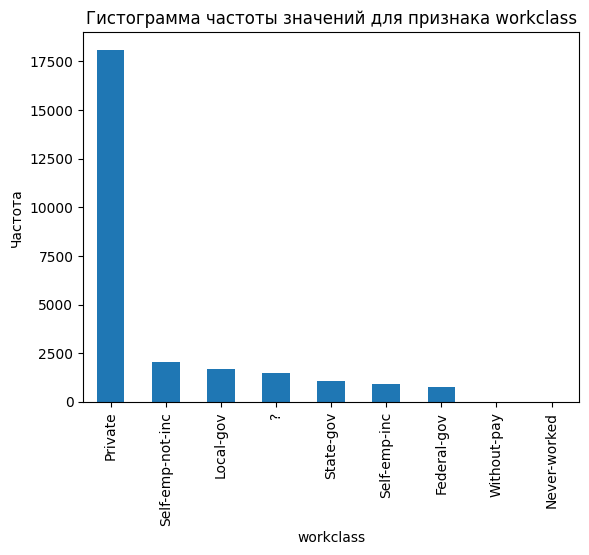

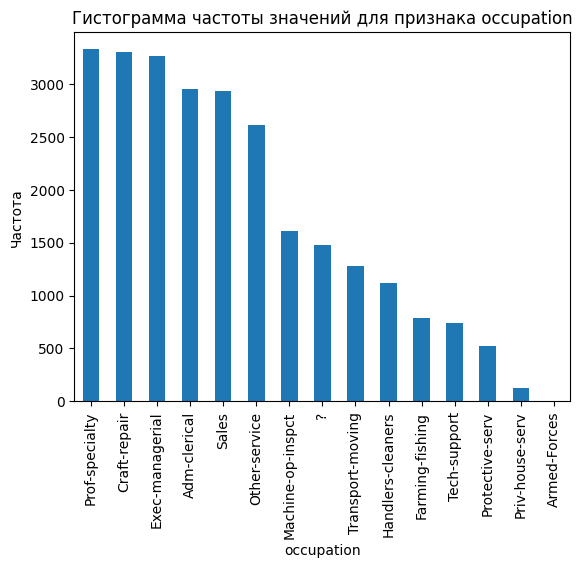

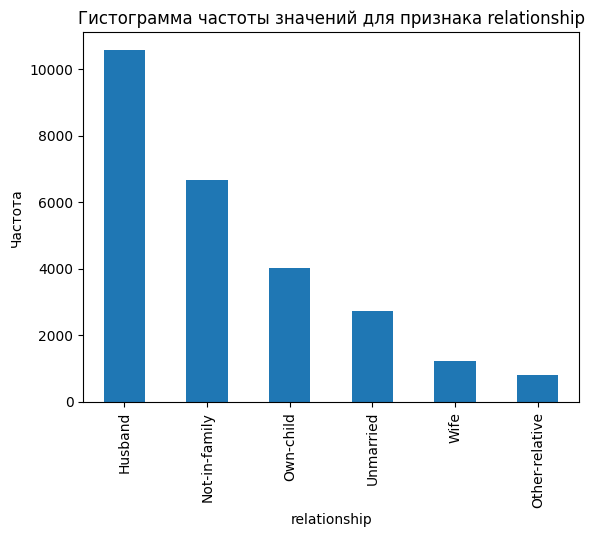

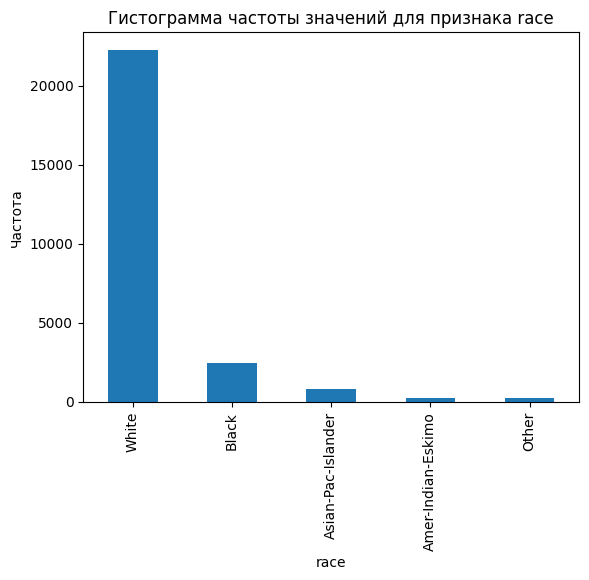

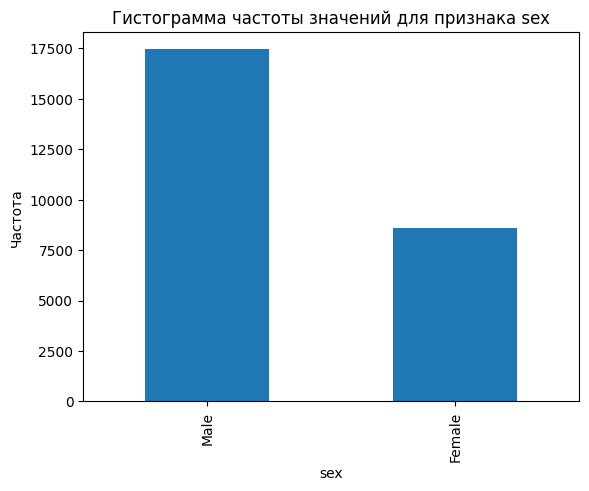

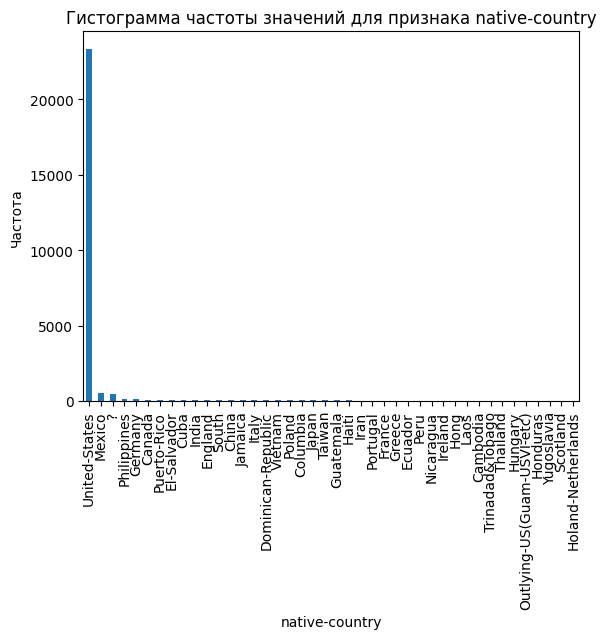

In [80]:
for column in data.select_dtypes(include=['object']).columns:
    value_counts = data[column].value_counts()

    plt.figure()
    value_counts.plot(kind='bar')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.title(f'Гистограмма частоты значений для признака {column}')
    plt.show()


## Удаление пропущенных значений

Определите число строк исходного набора данных (без колонок <code>education</code> и <code>marital-status</code>), в которых присутствует хотя бы одно пропущенное значение.

In [37]:
data_num

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label
0,32,37210,13,0,0,45,1
1,43,101950,14,0,0,45,0
2,20,122244,9,0,0,28,0
3,40,24763,10,6849,0,40,0
4,24,113936,13,0,0,40,0
...,...,...,...,...,...,...,...
26043,35,179171,9,0,0,38,0
26044,39,421633,10,0,0,30,0
26045,55,82098,9,0,0,55,0
26046,26,50053,13,0,0,55,0


In [38]:
name_col = data_num.drop(columns = 'label').columns.tolist()

In [43]:
data_droped = data.copy()

In [44]:
for col in data_droped.columns:
  data_droped[col] = data_droped[col].apply(lambda x: None if x == '?' else x )

In [45]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education-num     0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
label             0
dtype: int64

In [47]:
data_droped[(data_droped['workclass'].isna() == True) | (data_droped['occupation'].isna() == True) | (data_droped['native-country'].isna() == True)]

,age,workclass,fnlwgt,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
2,20,None,122244,9,None,Not-in-family,White,Female,0,0,28,United-States,0
9,28,None,149646,10,None,Own-child,White,Female,0,0,20,None,0
14,60,None,251572,9,None,Not-in-family,White,Male,0,0,35,Poland,0
15,34,None,317219,10,None,Wife,White,Female,0,0,20,United-States,1
40,36,None,94954,11,None,Not-in-family,White,Female,0,0,20,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25972,18,None,165532,8,None,Own-child,White,Male,0,0,25,United-States,0
26007,19,Private,258633,10,Adm-clerical,Own-child,White,Female,0,0,25,None,0
26011,45,None,260953,14,None,Husband,White,Male,0,0,40,United-States,0
26021,66,None,129476,13,None,Husband,White,Male,0,0,6,United-States,0


Видно, что в датасете содержится менее 10% строк, содержащих пропуски. Выкидывать такое количество строк — не очень хорошее дело, но почему бы не попробовать обойтись без них.

Удалите строки, содеражащие пропуски. Произведите <code>one-hot</code> кодировние нечисловых признаков, например, с помощью <code>pd.get_dummies(drop_first=True)</code>.

Введите число полученных признаков.

In [ ]:
data_droped

In [48]:
data_droped = data_droped.dropna()

In [49]:
data_droped = pd.get_dummies(data_droped , drop_first=True)

Обучите модель классификации аналогично тому, как это было проделано для базовой модели. Вычислите <code>f1_score()</code> модели.



In [67]:
x_train, x_test, y_train,y_test = train_test_split(data_droped.drop(columns = 'label'), data_droped['label'], random_state =13,test_size=0.2, stratify=data_droped['label'])

In [68]:
name_col = x_train.columns

In [69]:
scaler = MinMaxScaler().fit(x_train)

In [70]:
name_col = x_train.columns
scaler = MinMaxScaler().fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train))
x_test = pd.DataFrame(scaler.transform(x_test))
x_train.columns = name_col
x_test.columns = name_col

In [65]:
x_train

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.123288,0.068008,0.666667,0.00000,0.0,0.397959,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.068493,0.266709,0.133333,0.00000,0.0,0.397959,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.273973,0.130370,0.600000,0.00000,0.0,0.479592,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.191781,0.246396,0.800000,0.04101,0.0,0.500000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.123288,0.036348,0.533333,0.00000,0.0,0.397959,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18095,0.465753,0.012144,0.466667,0.00000,0.0,1.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18096,0.068493,0.150660,0.666667,0.00000,0.0,0.367347,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18097,0.068493,0.082825,0.600000,0.00000,0.0,0.091837,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18098,0.232877,0.111440,0.733333,0.00000,0.0,0.448980,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [71]:
knn3 = KNeighborsClassifier().fit(x_train,y_train)
round(f1_score(y_test, knn3.predict(x_test)),3)

0.6

In [ ]:
data.info()

Точность модели увеличилась по сравнению с моделью, которая использовала только числовые признаки.

## Заполнение пропущенных значений

Возможно точность еще повысится, если задействовать строки с пропущенными значениями. Используя исходный датасет (без колонок <code>education</code> и <code>marital-status</code>), заполните пропуски самым часто встречающимся значением в рамках столбца.

In [74]:
data2

,age,workclass,fnlwgt,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,32,Private,37210,13,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
1,43,Private,101950,14,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,0
2,20,?,122244,9,?,Not-in-family,White,Female,0,0,28,United-States,0
3,40,Local-gov,24763,10,Transport-moving,Unmarried,White,Male,6849,0,40,United-States,0
4,24,Private,113936,13,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,35,Self-emp-not-inc,179171,9,Sales,Unmarried,Black,Female,0,0,38,Germany,0
26044,39,Private,421633,10,Protective-serv,Unmarried,Black,Female,0,0,30,United-States,0
26045,55,Private,82098,9,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,55,United-States,0
26046,26,Private,50053,13,Exec-managerial,Husband,White,Male,0,0,55,United-States,0


In [73]:
data2=data.copy()

In [75]:
for col in data2.columns:
  data2[col] = data2[col].apply(lambda x: None if x == '?' else x )

In [76]:
imp_mean = SimpleImputer(missing_values= None, strategy='most_frequent').fit(data2)

In [77]:
imp_mean = SimpleImputer(missing_values= None, strategy='most_frequent').fit(data2)
data2 = pd.DataFrame(imp_mean.transform(data2))
data2.columns = data.columns

In [78]:
data2

,age,workclass,fnlwgt,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,32,Private,37210,13,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
1,43,Private,101950,14,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,0
2,20,Private,122244,9,Prof-specialty,Not-in-family,White,Female,0,0,28,United-States,0
3,40,Local-gov,24763,10,Transport-moving,Unmarried,White,Male,6849,0,40,United-States,0
4,24,Private,113936,13,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,35,Self-emp-not-inc,179171,9,Sales,Unmarried,Black,Female,0,0,38,Germany,0
26044,39,Private,421633,10,Protective-serv,Unmarried,Black,Female,0,0,30,United-States,0
26045,55,Private,82098,9,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,55,United-States,0
26046,26,Private,50053,13,Exec-managerial,Husband,White,Male,0,0,55,United-States,0


In [ ]:
data_num

In [81]:
data2[data_num.columns] = data2[data_num.columns].astype('int64')

In [ ]:
data2.info()

Далее по уже знакомому сценарию: <code>one-hot</code>, <code>split</code>, <code>scaling</code>, обучение и оценка.

Вычислите <code>f1_score()</code> модели.

In [83]:
data2 = pd.get_dummies(data2 , drop_first=True)
x_train, x_test, y_train,y_test = train_test_split(data2.drop(columns = 'label'), data2['label'], random_state =13,test_size=0.2, stratify=data2['label'])


In [84]:
name_col = x_train.columns
scaler = MinMaxScaler().fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train))
x_test = pd.DataFrame(scaler.transform(x_test))
x_train.columns = name_col
x_test.columns = name_col

In [85]:
knn4 = KNeighborsClassifier().fit(x_train,y_train)
round(f1_score(y_test, knn4.predict(x_test)),3)

0.6

## Проклятие размерности

В последнем пункте был получен набор данных, содержащий 76 признаков (кстати, попробуйте объяснить, почему в случае удаления строк число признаков в итоге оказалось равным 75), что является достаточным для того, чтобы столкнуться с так называемым проклятием размерности.

Для того, чтобы классификатор давал более качественные результаты, имеет смысл более внимательно и вдумчиво поработать с признаками с учетом проклятия размерности. Например, вернуть в рассмотрение признаки <code>education-num</code> и <code>marital-status</code>. А также более глубоко вникнуть в саму природу признаков.

# Чать 2
Используя весь датасет из предыдущего задания как обучающий, выполните предсказания для следующего набора данных. Для успешного выполнения задания необходимо, чтобы ваш результат превысил пороговое значение, равное 0.645. В качестве метрики используется f1_score.

In [112]:
!cp "/content/drive/MyDrive/magamed/introduction ML/KNN/adult_data_reserved.csv" /content/data_test.csv

In [118]:
data_first = pd.read_csv('data.csv')
data_test = pd.read_csv('data_test.csv')

In [119]:
name_first = data_first.columns
name_test = data_test.columns

In [120]:
data_first.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,32,Private,37210,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
1,43,Private,101950,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,0
2,20,?,122244,HS-grad,9,Never-married,?,Not-in-family,White,Female,0,0,28,United-States,0
3,40,Local-gov,24763,Some-college,10,Divorced,Transport-moving,Unmarried,White,Male,6849,0,40,United-States,0
4,24,Private,113936,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0


Змена "?"

In [121]:
for col in data_first.columns:
  data_first[col] = data_first[col].apply(lambda x: None if x == '?' else x )

In [122]:
for col in data_test.columns:
  data_test[col] = data_test[col].apply(lambda x: None if x == '?' else x )

замена пропусков на часто встречаемые знач

In [124]:
imp_most = SimpleImputer(missing_values= None, strategy='most_frequent').fit(data_first)
data_first = pd.DataFrame(imp_most.transform(data_first))
data_first.columns = name_first

imp_most2 = SimpleImputer(missing_values= None, strategy='most_frequent').fit(data_test)
data_test = pd.DataFrame(imp_most2.transform(data_test))
data_test.columns = name_test

In [129]:
d_test_name = data_num.drop(columns = 'label')

In [131]:
data_first[data_num.columns] = data_first[data_num.columns].astype('int64')
data_test[d_test_name.columns] = data_test[d_test_name.columns].astype('int64')

In [132]:
data_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26048 entries, 0 to 26047
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             26048 non-null  int64 
 1   workclass       26048 non-null  object
 2   fnlwgt          26048 non-null  int64 
 3   education       26048 non-null  object
 4   education-num   26048 non-null  int64 
 5   marital-status  26048 non-null  object
 6   occupation      26048 non-null  object
 7   relationship    26048 non-null  object
 8   race            26048 non-null  object
 9   sex             26048 non-null  object
 10  capital-gain    26048 non-null  int64 
 11  capital-loss    26048 non-null  int64 
 12  hours-per-week  26048 non-null  int64 
 13  native-country  26048 non-null  object
 14  label           26048 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.0+ MB


In [133]:
data_first = pd.get_dummies(data_first , drop_first=True)
data_test = pd.get_dummies(data_test , drop_first=True)

In [134]:
x_train, x_test, y_train,y_test = train_test_split(data_first.drop(columns = 'label'), data_first['label'], random_state =13, stratify=data_first['label'])

In [135]:
name_col = x_train.columns
scaler = MinMaxScaler().fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train))
x_test = pd.DataFrame(scaler.transform(x_test))
x_train.columns = name_col
x_test.columns = name_col

In [140]:
knn4 = KNeighborsClassifier().fit(x_train,y_train)
round(f1_score(y_test, knn4.predict(x_test)),3)

0.617

In [141]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier().fit(x_train,y_train)
round(f1_score(y_test, clf.predict(x_test)),3)

0.674

In [145]:
data_first

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,32,37210,13,0,0,45,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,43,101950,14,0,0,45,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,20,122244,9,0,0,28,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,40,24763,10,6849,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,24,113936,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,35,179171,9,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26044,39,421633,10,0,0,30,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
26045,55,82098,9,0,0,55,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
26046,26,50053,13,0,0,55,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [144]:
data_test

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,31,117963,16,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,20,201490,10,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,78,385242,13,9386,0,45,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,32,164197,13,0,0,44,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,61,92691,9,0,0,3,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,42,32185,13,0,0,60,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6509,34,180714,10,0,2179,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6510,39,202027,15,0,0,45,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6511,29,125976,9,0,0,35,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [148]:
for el in data_first.columns:
  if el not in data_test.columns:
    print(el)

label
native-country_Holand-Netherlands


In [ ]:
data_first

In [ ]:
knn5 = KNeighborsClassifier().fit(data_first.drop(columns = ['label','native-country_Holand-Netherlands']),data_first['label'])
str(knn5.predict(data_test).tolist())

In [ ]:
str(knn5.predict(data_test).tolist())

In [152]:
clf = RandomForestClassifier().fit(data_first.drop(columns = ['label','native-country_Holand-Netherlands']),data_first['label'])

In [153]:
str(clf.predict(data_test).tolist())

'[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,